In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\bharg\Downloads\heart_v2.csv')
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
data.shape

(270, 5)

In [5]:
data.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [6]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
data.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [8]:
data['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [9]:
y = data.iloc[:, -1]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

In [10]:
X = data.iloc[:, :-1]
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(max_depth = 3)

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

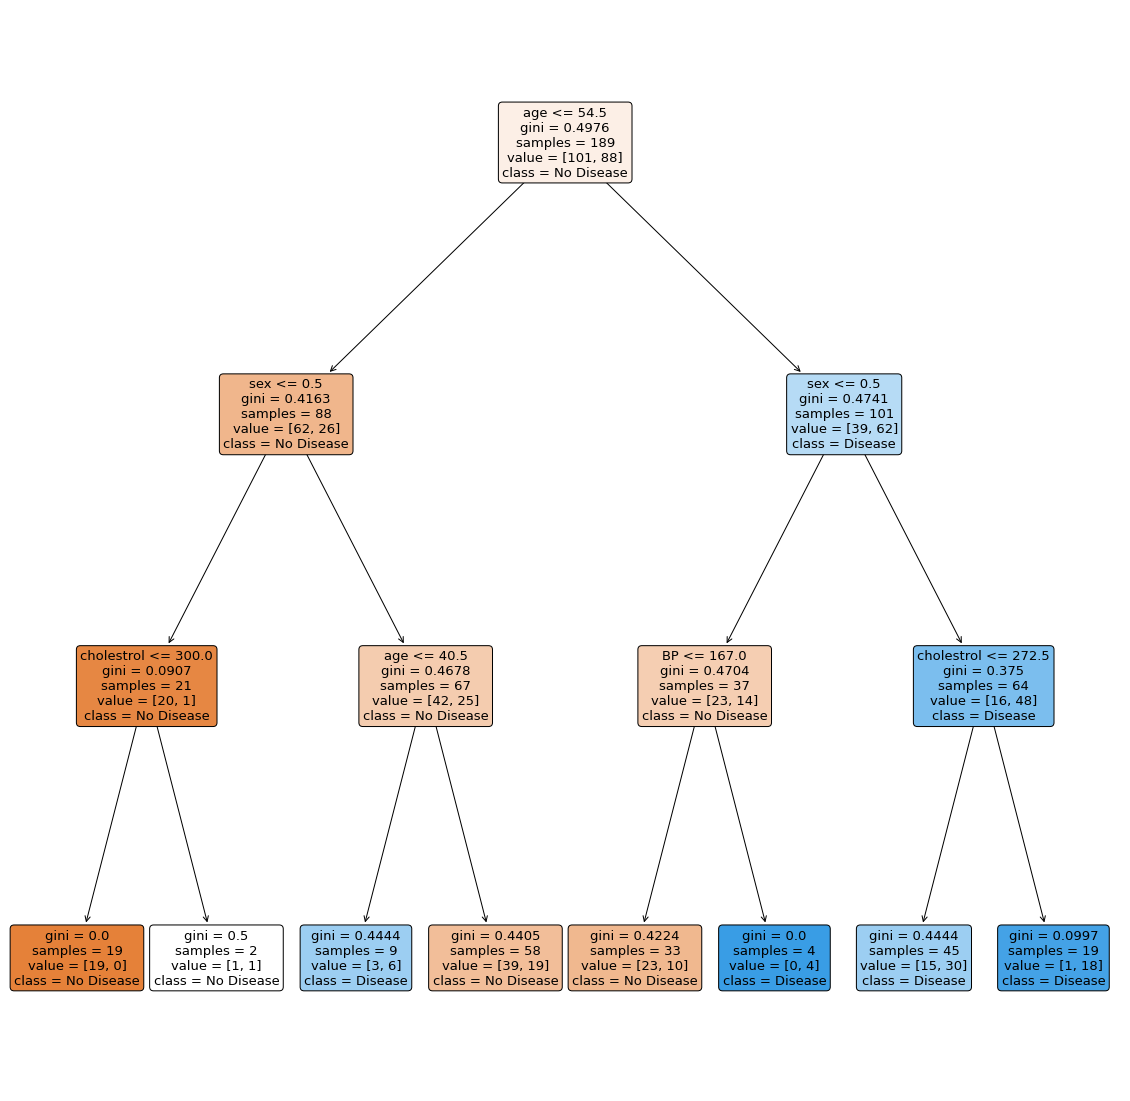

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
dec_tree= plot_tree(decision_tree=dt, feature_names = X.columns, 
              class_names = ['No Disease', 'Disease'], filled = True , precision = 4, ax = ax,
              rounded = True)

In [29]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
    
    

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))

0.7407407407407407


In [31]:
print(accuracy_score(y_test, y_test_pred))

0.6049382716049383


In [37]:
#hyperparamters
from sklearn.model_selection import GridSearchCV

In [39]:
params = {
    'max_depth':[2,3,5,10],
    'min_samples_leaf':[5,10,15,50,100],
    'min_samples_split': [3, 6,9],
    'criterion': ['gini', 'entropy']
}

In [42]:
grid = GridSearchCV(estimator = dt, param_grid = params, cv = 4, n_jobs = -1, verbose =2, scoring = 'accuracy' )

In [43]:
grid.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 15, 50, 100],
                         'min_samples_split': [3, 6, 9]},
             scoring='accuracy', verbose=2)

In [44]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=3)

In [46]:
dt_best = grid.best_estimator_

In [47]:
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=3)

In [48]:
y_test_pred = dt_best.predict(X_test)

In [49]:
print(accuracy_score(y_test, y_test_pred))

0.6172839506172839
